## INTRODUCTION

* **FEATURES**:

1. _**InvoiceNo**_: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
2. _**StockCode**_: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
3. _**Description**_: Product (item) name. Nominal.
4. _**Quantity**_: The quantities of each product (item) per transaction. Numeric.
5. _**InvoiceDate**_: Invice Date and time. Numeric, the day and time when each transaction was generated.
6. _**UnitPrice**_: Unit price. Numeric, Product price per unit in sterling.
7. _**CustomerID**_: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
8. _**Country**_: Country name. Nominal, the name of the country where each customer resides.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from datetime import datetime
import datetime
from sklearn.preprocessing import StandardScaler

# Data loading, cleaning and preprocessing

In [2]:
df = pd.read_csv('data.csv',encoding= 'unicode_escape')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
# Create TotalPrice column
df['TotalPrice'] = df["Quantity"] * df["UnitPrice"]
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [5]:
df.shape

(541909, 9)

In [6]:
#Check null value in dataset
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
TotalPrice          0
dtype: int64

In [7]:
#Handle with missing value
df.dropna(axis = 0, inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
 8   TotalPrice   406829 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 31.0+ MB


In [9]:
#Convert to date time
df['InvoiceDate']=pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')

In [10]:
df.describe()

,Quantity,UnitPrice,CustomerID,TotalPrice
count,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570,20.401854
std,248.693370,69.315162,1713.600303,427.591718
min,-80995.000000,0.000000,12346.000000,-168469.600000
25%,2.000000,1.250000,13953.000000,4.200000
50%,5.000000,1.950000,15152.000000,11.100000
75%,12.000000,3.750000,16791.000000,19.500000
max,80995.000000,38970.000000,18287.000000,168469.600000


### *Deal with outliers*

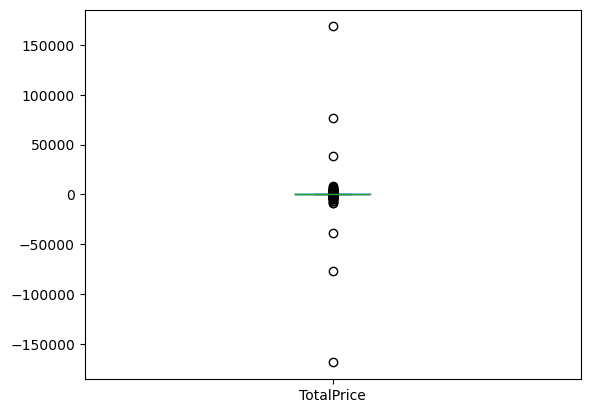

In [11]:
# check outliers
df['TotalPrice'].plot(kind='box');

In [12]:
# handle with outliers
df = df[(np.abs(stats.zscore(df[["TotalPrice"]])) < 3).all(axis=1)]

#replace the value of quantity
df = df.loc[df["Quantity"] >0 ]
df["Quantity"].min()

1

# Exploratory Data Analysis (EDA)

### 1. Overall trend in total sales over time

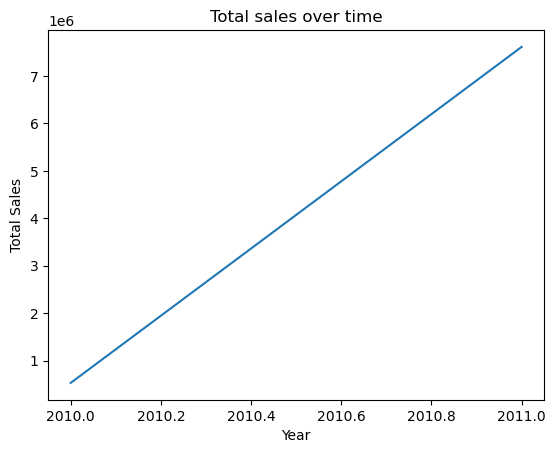

In [13]:
df['Year'] = df['InvoiceDate'].dt.year
total_sales = df.groupby('Year')['TotalPrice'].sum()

#plot the total sales over time
sns.lineplot(x=total_sales.index, y=total_sales.values)
plt.title("Total sales over time")
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show();

=> Total Sale **increased** steadily over time

### 2. Total Sale for each Country

In [14]:
sale_country = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
sale_country_df = pd.DataFrame(sale_country).reset_index()
sale_country_df

,Country,TotalPrice
0,United Kingdom,6592735.094
1,Netherlands,276484.740
2,EIRE,256674.360
3,Germany,228867.140
4,France,199069.450
5,Australia,136802.910
6,Spain,57527.110
7,Switzerland,56443.950
8,Belgium,41196.340
9,Sweden,38378.330


=> UK has the _highest_ total sales, followed by the Netherlands and EIRE respectively. It's understandable since the company is based in the UK, so it will sell more products in here

## 3. The best selling products

In [15]:
best_selling_products =df.groupby(['StockCode','Description'])['Quantity'].sum().sort_values(ascending=False).iloc[:50]
df_best_selling =best_selling_products.to_frame().reset_index()
df_best_selling .head()

,StockCode,Description,Quantity
0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415
1,85099B,JUMBO BAG RED RETROSPOT,42981
2,21212,PACK OF 72 RETROSPOT CAKE CASES,33693
3,84879,ASSORTED COLOUR BIRD ORNAMENT,30314
4,85123A,WHITE HANGING HEART T-LIGHT HOLDER,29263


## 4. Purchase frequency

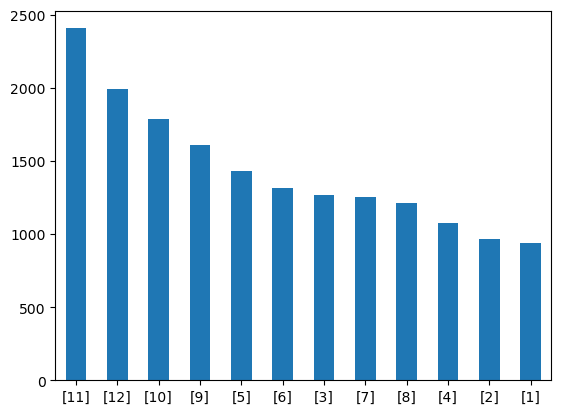

In [16]:
df['Month'] = df['InvoiceDate'].dt.month
df.groupby('InvoiceDate')['Month'].unique().value_counts().sort_values(ascending=False).plot(kind='bar',rot=0);

In [17]:
df_month_november = df.loc[df["Month"] == 11]
df_month_november.groupby("Description")['Quantity'].count().sort_values(ascending=False)

Description
RABBIT NIGHT LIGHT                    464
PAPER CHAIN KIT 50'S CHRISTMAS        358
HOT WATER BOTTLE KEEP CALM            270
PAPER CHAIN KIT VINTAGE CHRISTMAS     240
WHITE HANGING HEART T-LIGHT HOLDER    237
                                     ... 
LETTER "J" BLING KEY RING               1
LETTER "G" BLING KEY RING               1
UNION STRIPE CUSHION COVER              1
UNION JACK HOT WATER BOTTLE             1
VINTAGE RED KITCHEN CABINET             1
Name: Quantity, Length: 2719, dtype: int64

=> November looks like the month with most orders. Because November has special events like Black Friday, Cyber Monday, or Thanksgiving. And according to the above analysis, the items most ordered by customers in November are Christmas related items.
_Suggest_: Capitalize on the increased demand in November by offering exclusive promotions, discounts, or limited-time offers.

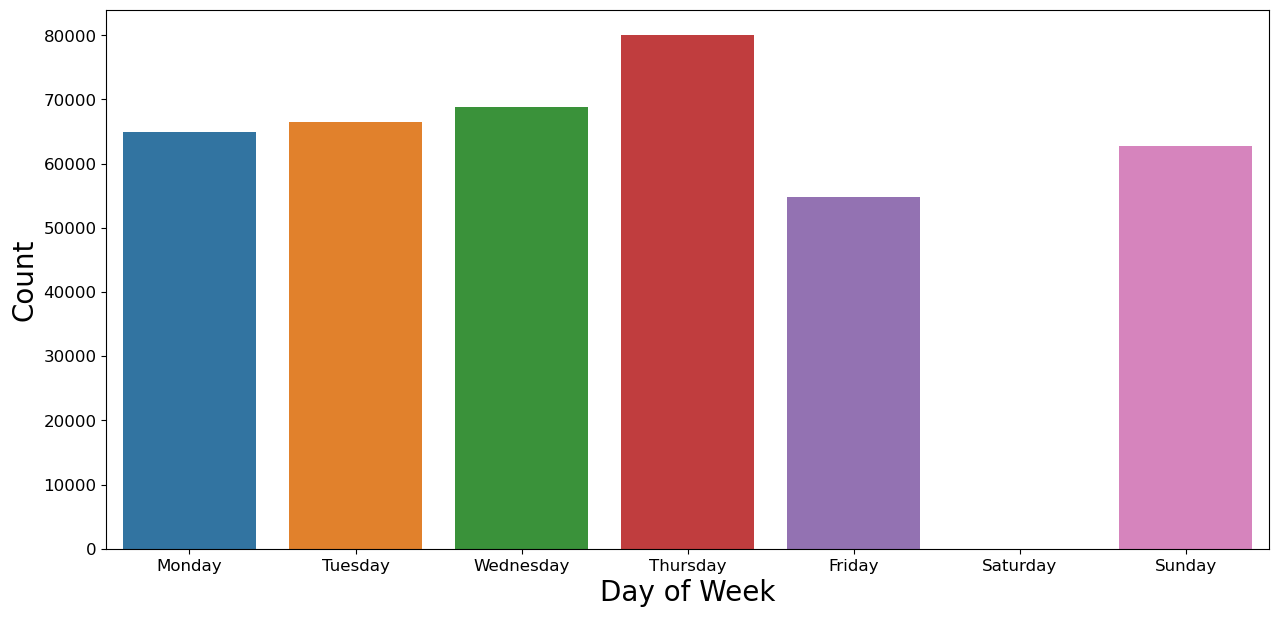

In [18]:
def day_encode(date):
    if date.dayofweek == 0:
        return "Monday"
    elif date.dayofweek == 1:
        return "Tuesday"
    elif date.dayofweek == 2:
        return "Wednesday"
    elif date.dayofweek == 3:
        return "Thursday"
    elif date.dayofweek == 4:
        return "Friday"
    elif date.dayofweek == 5:
        return "Saturday"
    else:
        return "Sunday"
df['DayofWeek'] = df['InvoiceDate'].map(day_encode)

fig  = plt.figure(figsize = (15,7))
countplot = sns.countplot(data=df,x="DayofWeek",order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"], palette="tab10")

countplot.set_xlabel("Day of Week",fontsize=20)
countplot.set_ylabel("Count",fontsize=20)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()    

=>  It looks like *Thursday* is the day with most orders

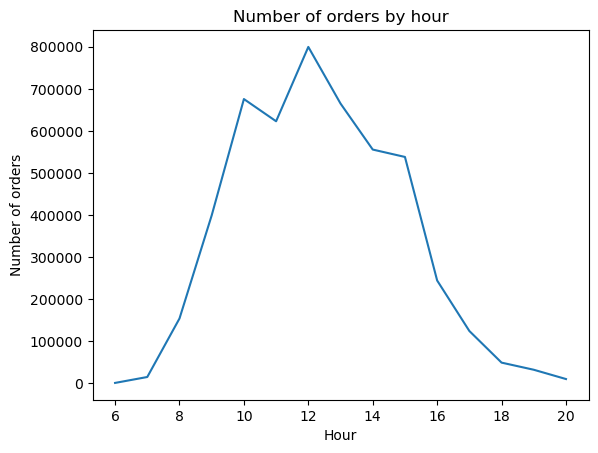

In [19]:
df['Hour'] = df['InvoiceDate'].dt.hour
sales_hour = df.groupby('Hour')['Quantity'].sum()

sns.lineplot(x=sales_hour.index, y=sales_hour.values)
plt.title("Number of orders by hour")
plt.xlabel('Hour')
plt.ylabel('Number of orders')
plt.show();

* Most orders are placed between 10AM and 14PM. The peak is at 12PM. Maybe it's time for people to take a break time so they'll spend their time to order

## 5. Which Customers Contributed the Most to Total Sales

In [20]:
customers = df.groupby("CustomerID").agg({"InvoiceDate":"nunique","TotalPrice":"sum"}).rename({"InvoiceDate":"Number_of_Orders","TotalPrice":"Total_Purchases"},axis = 1).sort_values(by ="Total_Purchases", ascending = False)
customers["Percent_of_TotalSales"] = (customers["Total_Purchases"]/df["TotalPrice"].sum()).map("{:.2%}".format)
customers.head(15)

,Number_of_Orders,Total_Purchases,Percent_of_TotalSales
CustomerID,,,
14646.0,72,271244.42,3.33%
14911.0,199,140450.72,1.72%
18102.0,50,136727.80,1.68%
12415.0,20,123196.13,1.51%
14156.0,54,111882.43,1.37%
17450.0,42,100795.83,1.24%
17511.0,32,91062.38,1.12%
13694.0,50,65039.62,0.80%
16684.0,26,62538.76,0.77%


# CUSTOMER SEGMENTATION

* To segmenting customers, an effective method that we can use here is **RFM analysis** (_recency, frequency, and monetary value_). The  idea is to segment customers based on when their _last purchase_ was, _how often_ they’ve purchased in the past, and _how much_ they’ve spent overall

#### 1. RFM Analysis

In [21]:
# Create records recency
recency_date = max(df.InvoiceDate) + datetime.timedelta(days=1)

# Aggregate data by each customer
customers = df.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (recency_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'})
# Rename columns
customers.rename(columns = {'InvoiceDate': 'Recency',
                            'InvoiceNo': 'Frequency',
                            'TotalPrice': 'MonetaryValue'}, inplace=True)
customers

,Recency,Frequency,MonetaryValue
CustomerID,,,
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
12352.0,36,85,2506.04
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


#### 2. Normalize data

In [22]:
scaler = StandardScaler()
# Fit and Transform The Data
scaler.fit(customers)
customers_normalized = scaler.transform(customers)

In [23]:
customers_normalized

array([[-0.90607283,  0.39437041,  0.34146605],
       [-0.17564136, -0.26556302, -0.01144879],
       [-0.73597235, -0.08200538, -0.01702322],
       ...,
       [-0.84603737, -0.348601  , -0.23886255],
       [-0.88606101,  2.9029915 ,  0.03035447],
       [-0.4958305 , -0.09511664, -0.00582521]])

#### 3. Modeling

In [31]:
import warnings
warnings.filterwarnings("ignore")

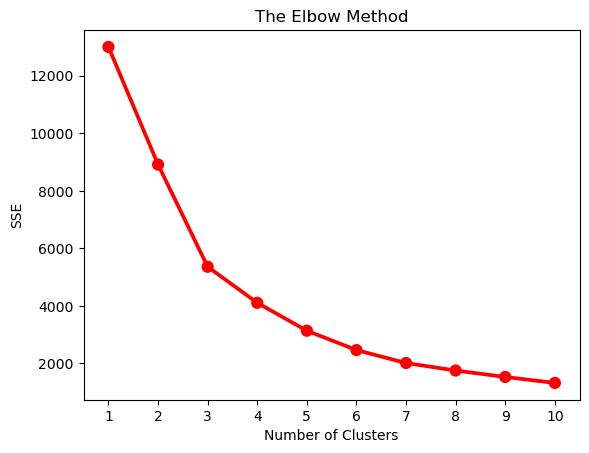

In [32]:
wscc = {}
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(customers_normalized)
    wscc[i] = kmeans.inertia_ # SSE to closest cluster centroid
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
sns.pointplot(x=list(wscc.keys()), y=list(wscc.values()),color='red')
plt.show();

* The elbow in the graph is the **four-cluster mark**. This is the only place until which the graph is steeply declining while smoothing out afterward. So, we choose **k = 4**

In [29]:
kmeans = KMeans(n_clusters=4,random_state=42)
model = kmeans.fit(customers_normalized)

In [30]:
pred = kmeans.predict(customers_normalized)
frame = pd.DataFrame(customers)
frame['Cluster'] = pred
frame

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12347.0,2,182,4310.00,0
12348.0,75,31,1797.24,0
12349.0,19,73,1757.55,0
12350.0,310,17,334.40,1
12352.0,36,85,2506.04,0
...,...,...,...,...
18280.0,278,10,180.60,1
18281.0,181,7,80.82,1
18282.0,8,12,178.05,0


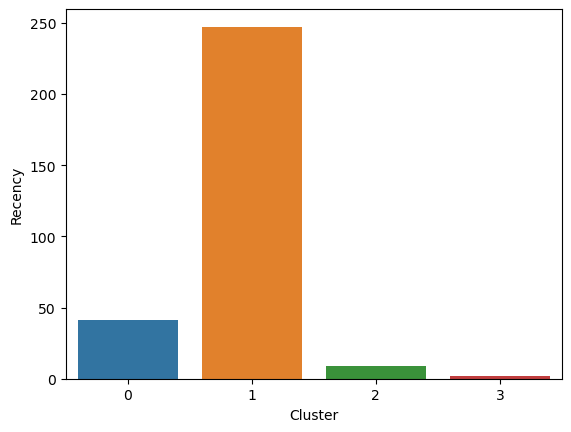

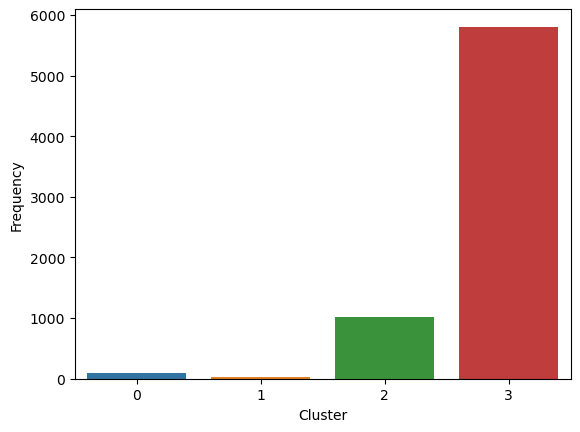

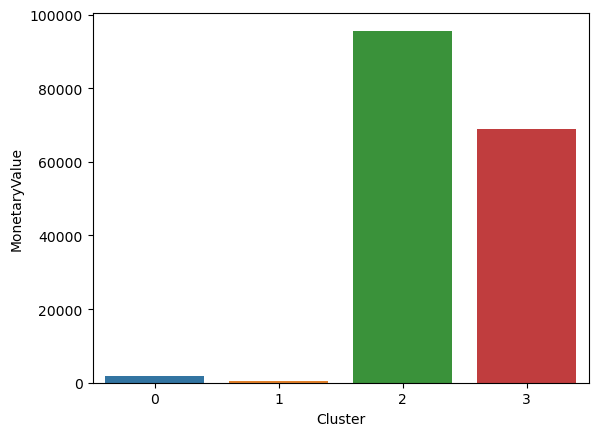

In [27]:
list1 = ['Recency','Frequency','MonetaryValue']
avg_df = frame.groupby(['Cluster'], as_index=False).mean()
for i in list1:
    sns.barplot(x='Cluster',y=str(i),data=avg_df)
    plt.show()

* We can classify our customer based on which cluster they belong. Let's determine what kind of customers is in each cluster.

* **Cluster 0**: "_Hibernating Customers_" - Those are the customers that buys at the lowest frequency, the lowest recently and that spend the least money. 
* **Cluster 1**: "_New Customers_" - Those are customers that have been active quite recently that might be interesting to keep stimulated. =>  Excute seasonal **promotion** like seasonal discount, bundle offers, etc.
* **Cluster 2**: "_Potential Loyalists_" -Those are the customers that buys at the medium frequency, the medium recently and that spend the most money. => It would be great to recommend **expensive products** to this segment group.
* **Cluster 3**: "_Need Atention_" - Those are the customers that have aove average in frequency and monetary value, but no recent purchases. => The company should **focus on this cluster**, as it will result in **the highest ROI**.Design and implement **targeted marketing campaigns** specifically aimed at **re-engaging customers** who have not made a recent purchase. _Send personalized emails, offers, or notifications_ to remind them of your brand and incentivize them to make a return visit or purchase.

# Conclusions and Recommendations

### 1. Conclusions

* The general sales trend increases in November of the year, manly due to the UK market
* There are differencies in the best-selling items based on the country. The best-selling item overall is the WORLD WAR 2 GLIDERS ASSTD DESIGNS	
* Apparently the most active moment of the day is around noon, most of the customers purchase items during this time of the day


### 2. Recommendations

* We can use the results of the machine learning model to identify customers who are more likely to purchase related products and target them with personalized product recommendations or bundle offers.
* We can use the results of the clustering to identify trends or patterns that may suggest opportunities for product or process innovation, such as identifying new product ideas or ways to streamline the fulfillment process.
* We can consider expanding or diversifying the product offerings to the top 10 countries identified in the analysis, as these countries have shown the highest total sales.